<a href="https://colab.research.google.com/github/silentcodern1/VENDOR-PERFORMANCE-ANALSIS/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

sales_df = pd.read_csv('/content/sales.csv')
purchases_df = pd.read_csv('/content/purchases.csv')
end_inventory_df = pd.read_csv('/content/end_inventory.csv')
begin_inventory_df = pd.read_csv('/content/begin_inventory.csv')
vendor_voice_df = pd.read_csv('/content/vendor_voice.csv')
purchase_price_df = pd.read_csv('/content/purchase_price.csv')

print("Sales DataFrame head:")
print(sales_df.head())
print("\nPurchases DataFrame head:")
print(purchases_df.head())
print("\nEnd Inventory DataFrame head:")
print(end_inventory_df.head())
print("\nBegin Inventory DataFrame head:")
print(begin_inventory_df.head())
print("\nVendor Voice DataFrame head:")
print(vendor_voice_df.head())
print("\nPurchase Price DataFrame head:")
print(purchase_price_df.head())

Sales DataFrame head:
           InventoryId  Store  Brand                 Description        Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   SalesQuantity  SalesDollars  SalesPrice   SalesDate  Volume  \
0              1         16.49       16.49  01-01-2024     750   
1              2         32.98       16.49  02-01-2024     750   
2              1         16.49       16.49  03-01-2024     750   
3              1         14.49       14.49  08-01-2024     750   
4              2         69.98       34.99  09-01-2024     375   

   Classification  ExciseTax  VendorNo                   VendorName  
0               1       0.79  

In [5]:
from sqlalchemy import create_engine
engine=create_engine('sqlite:///inventory.db')

In [6]:
def ingest_db(df,table_name):
  df.to_sql(table_name,engine,if_exists='replace',index=False)

In [7]:
import logging

# 1. Create a logger instance named 'file_logger'
file_logger = logging.getLogger('file_logger')

# 2. Set its logging level to logging.INFO
file_logger.setLevel(logging.INFO)

# Ensure handlers are not duplicated if the cell is run multiple times
if not file_logger.handlers:
    # 3. Create a FileHandler to direct log messages to a file named 'ingesting_db.log'
    file_handler = logging.FileHandler('ingesting_db.log')

    # 4. Define a Formatter with the specified format string
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

    # 5. Set the formatter for the FileHandler
    file_handler.setFormatter(formatter)

    # 6. Add the FileHandler to the file_logger
    file_logger.addHandler(file_handler)

file_logger.info("File logger configured successfully.")
print("File logger has been configured and an initial log message sent to 'ingesting_db.log'.")

INFO:file_logger:File logger configured successfully.


File logger has been configured and an initial log message sent to 'ingesting_db.log'.


In [8]:
import time
import pandas as pd

def load_and_log_file(filename, logger):
    logger.info(f"Starting to load file: {filename}")
    start_time = time.time()

    # Simulate file loading
    # In a real scenario, this would be pd.read_csv(filename) or similar
    # For this simulation, we'll just use a placeholder to represent the operation
    try:
        # For demonstration, we'll actually load the sales.csv to simulate real work
        # In a full solution, this might be a more generic file read or processing step
        df = pd.read_csv(filename)
        # Optionally, do something with df to make the simulation more 'real'
        # e.g., len(df)
        status = "successfully loaded"
    except Exception as e:
        status = f"failed to load: {e}"
        logger.error(f"Error loading {filename}: {e}")

    end_time = time.time()
    duration = end_time - start_time
    logger.info(f"Finished loading file: {filename}. Status: {status}. Duration: {duration:.4f} seconds.")
    return df if 'df' in locals() else None # Return the dataframe if loaded, otherwise None

# Simulate loading 'sales.csv' and log the event
sales_loaded_df = load_and_log_file('/content/sales.csv', file_logger)

print("Simulated file loading event logged. Check 'ingesting_db.log' for details.")

INFO:file_logger:Starting to load file: /content/sales.csv
INFO:file_logger:Finished loading file: /content/sales.csv. Status: successfully loaded. Duration: 0.0206 seconds.


Simulated file loading event logged. Check 'ingesting_db.log' for details.


In [9]:
with open('ingesting_db.log', 'r') as f:
    log_content = f.read()
print("Content of ingesting_db.log:")
print(log_content)

Content of ingesting_db.log:
2025-12-12 13:05:17,646 - INFO - File logger configured successfully.
2025-12-12 13:05:17,655 - INFO - Starting to load file: /content/sales.csv
2025-12-12 13:05:17,678 - INFO - Finished loading file: /content/sales.csv. Status: successfully loaded. Duration: 0.0206 seconds.



# **Exploratory Data Analysis**

In [10]:
print("Columns for Sales DataFrame:")
print(sales_df.columns.tolist())

print("\nColumns for Purchases DataFrame:")
print(purchases_df.columns.tolist())

print("\nColumns for End Inventory DataFrame:")
print(end_inventory_df.columns.tolist())

print("\nColumns for Begin Inventory DataFrame:")
print(begin_inventory_df.columns.tolist())

print("\nColumns for Vendor Voice DataFrame:")
print(vendor_voice_df.columns.tolist())

print("\nColumns for Purchase Price DataFrame:")
print(purchase_price_df.columns.tolist())

Columns for Sales DataFrame:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']

Columns for Purchases DataFrame:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

Columns for End Inventory DataFrame:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

Columns for Begin Inventory DataFrame:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

Columns for Vendor Voice DataFrame:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

Columns for Purchase Price DataFrame:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'P

In [11]:
print("\n--- Sales DataFrame Info ---")
sales_df.info()

print("\n--- Purchases DataFrame Info ---")
purchases_df.info()

print("\n--- End Inventory DataFrame Info ---")
end_inventory_df.info()

print("\n--- Begin Inventory DataFrame Info ---")
begin_inventory_df.info()

print("\n--- Vendor Voice DataFrame Info ---")
vendor_voice_df.info()

print("\n--- Purchase Price DataFrame Info ---")
purchase_price_df.info()


--- Sales DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6786 entries, 0 to 6785
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InventoryId     6786 non-null   object 
 1   Store           6786 non-null   int64  
 2   Brand           6786 non-null   int64  
 3   Description     6786 non-null   object 
 4   Size            6786 non-null   object 
 5   SalesQuantity   6786 non-null   int64  
 6   SalesDollars    6786 non-null   float64
 7   SalesPrice      6786 non-null   float64
 8   SalesDate       6786 non-null   object 
 9   Volume          6786 non-null   int64  
 10  Classification  6786 non-null   int64  
 11  ExciseTax       6786 non-null   float64
 12  VendorNo        6786 non-null   int64  
 13  VendorName      6786 non-null   object 
dtypes: float64(3), int64(6), object(5)
memory usage: 742.3+ KB

--- Purchases DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [12]:
print("Entries for Vendor 4466 in purchases_df:")
display(purchases_df[purchases_df['VendorNumber'] == 4466])

print("\nEntries for Vendor 4466 in vendor_voice_df:")
display(vendor_voice_df[vendor_voice_df['VendorNumber'] == 4466])

print("\nEntries for Vendor 4466 in purchase_price_df:")
display(purchase_price_df[purchase_price_df['VendorNumber'] == 4466])

print("\nEntries for Vendor 4466 in sales_df (using VendorNo column):")
display(sales_df[sales_df['VendorNo'] == 4466])

Entries for Vendor 4466 in purchases_df:


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,22-12-2023,01-01-2024,07-01-2024,21-02-2024,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,22-12-2023,02-01-2024,07-01-2024,21-02-2024,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,22-12-2023,01-01-2024,07-01-2024,21-02-2024,9.35,6,56.10,1



Entries for Vendor 4466 in vendor_voice_df:


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
1,4466,AMERICAN VINTAGE BEVERAGE,07-01-2024,8137,22-12-2023,21-02-2024,15,140.55,8.57,NaN
90,4466,AMERICAN VINTAGE BEVERAGE,19-01-2024,8207,27-12-2023,26-02-2024,335,3142.33,16.97,NaN
189,4466,AMERICAN VINTAGE BEVERAGE,18-01-2024,8307,03-01-2024,18-02-2024,41,383.35,1.99,NaN
284,4466,AMERICAN VINTAGE BEVERAGE,27-01-2024,8469,14-01-2024,11-03-2024,72,673.20,3.30,NaN
380,4466,AMERICAN VINTAGE BEVERAGE,04-02-2024,8532,19-01-2024,15-03-2024,79,740.21,3.48,NaN
486,4466,AMERICAN VINTAGE BEVERAGE,09-02-2024,8604,24-01-2024,15-03-2024,347,3261.37,17.61,NaN
586,4466,AMERICAN VINTAGE BEVERAGE,17-02-2024,8793,05-02-2024,02-04-2024,72,675.36,3.17,NaN
691,4466,AMERICAN VINTAGE BEVERAGE,01-03-2024,8892,12-02-2024,28-03-2024,117,1096.05,5.15,NaN
798,4466,AMERICAN VINTAGE BEVERAGE,07-03-2024,8995,19-02-2024,02-04-2024,129,1209.27,5.44,NaN
899,4466,AMERICAN VINTAGE BEVERAGE,12-03-2024,9033,22-02-2024,16-04-2024,147,1377.87,6.61,NaN



Entries for Vendor 4466 in purchase_price_df:


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
1197,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1212,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE



Entries for Vendor 4466 in sales_df (using VendorNo column):


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName


* By thought analysis the purchases table contains actual purchase data, including the date of purchase, products(brands) purchased by vendors, the amount paid(in dollars ),and the quantity purchased.

* The purchase price column is derived
from the purchase_price table, which provides product-wise actual and purchase prices.The combination of vendor and brand is unique in this table.

* The vendor_invoice table aggregates data from the purchases table, summarizing quantity and dollar amounts,along with an additional column for freight.this table maintains uniqueness based on vendor and PO number.

* The sales table captures actual sales transtions, detalling the brands purchased by vendors, the quantity sold, the selling price,and the revenue earned.

--------------------------------------
As the data that we need for analysis is distributed in different tables, we need to create a summary table containing:

* purchase transactions made by vendors
*  sales transaction data
* freight costs for each vendor
* actual product prices from vendors







In [13]:
vendor_voice_df.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [14]:
ingest_db(vendor_voice_df, 'vendor_invoice')
freight_summary=pd.read_sql_query("""select VendorNumber, SUM(Freight) as FreightCost From vendor_invoice
Group BY VendorNumber""",con=engine)
print("Freight Summary by VendorNumber:")
print(freight_summary.head())

Freight Summary by VendorNumber:
   VendorNumber  FreightCost
0             2        27.08
1            54         0.48
2            60       367.52
3           105        62.39
4           200         6.19


In [15]:
purchases_df.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

In [16]:
purchase_price_df.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

In [17]:
ingest_db(purchases_df, 'purchases')
ingest_db(purchase_price_df, 'purchase_prices')
pd.read_sql_query("""SELECT
p.VendorNumber,
p.VendorName,
p.Brand,
p.PurchasePrice,
pp.Volume,
pp.Price as ActualPrice,
SUM(p.Quantity) AS TotalPurchaseQuantity,
SUM(p.Dollars) AS TotalPurchaseDollars
FROM purchases p
JOIN purchase_prices pp
ON p.Brand=pp.Brand
WHERE p.PurchasePrice>0
GROUP BY p.VendorNumber, p.VendorName, p.Brand
ORDER BY TotalPurchaseDollars""",con=engine)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,1392,CONSTELLATION BRANDS INC,28579,3.24,750,7.99,1,3.24
1,12546,JIM BEAM BRANDS COMPANY,8172,0.71,50,0.99,9,6.39
2,3960,DIAGEO NORTH AMERICA INC,3607,0.72,50,0.99,9,6.48
3,4380,CHARLES JACQUIN ET CIE INC,5137,6.61,750,9.99,1,6.61
4,4425,MARTIGNETTI COMPANIES,46096,6.80,750,9.99,1,6.80
...,...,...,...,...,...,...,...,...
1777,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,1241,20066.97
1778,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,997,23120.43
1779,480,BACARDI USA INC,3858,17.77,750,23.99,1847,32821.19
1780,480,BACARDI USA INC,4227,14.17,1750,17.99,2418,34263.06


In [18]:
sales_df.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [19]:
ingest_db(sales_df, 'sales')
pd.read_sql_query("""SELECT
VendorNo,
Brand,
SUM(SalesDollars) AS TotalSalesDollars,
SUM(SalesPrice) AS TotalSalesPrice,
SUM(SalesQuantity) AS TotalQuantity
FROM sales
GROUP BY VendorNo, Brand
ORDER BY TotalSalesDollars""",con=engine)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalQuantity
0,1392,18000,3.99,3.99,1
1,12546,1006,3.99,3.99,1
2,9819,17867,6.99,6.99,1
3,90024,23969,7.99,7.99,1
4,10754,18748,8.29,8.29,1
...,...,...,...,...,...
1251,17035,2589,1967.53,709.83,47
1252,3960,2757,2009.33,539.82,67
1253,12546,1376,2422.94,526.77,106
1254,17035,2585,2558.93,597.75,107


In [20]:
import time
start=time.time()
final_table=pd.read_sql_query("""SELECT
pp.VendorNumber,
pp.VendorName,
pp.Brand,
pp.Description,
pp.Price,
pp.PurchasePrice,
SUM(s.SalesQuantity)AS TotalSalesQuantity,
SUM(s.SalesDollars) AS TotalSalesDollars,
SUM(s.SalesPrice) AS TotalSalesPrice,
SUM(s.ExciseTax) AS TotalExciseTax,
SUM(vi.Quantity) AS TotalPurchaseQuantity,
SUM(vi.Dollars) AS TotalPurchaseDollars,
SUM(vi.Freight) AS TotalFreightCost
FROM purchase_prices pp
JOIN sales s
ON pp.VendorNumber= s.vendorNo
AND pp.Brand= s.Brand
JOIN vendor_invoice vi
ON pp.VendorNumber= vi.VendorNumber
GROUP BY pp.VendorNumber, pp.VendorName, pp.Brand, pp.Description, pp.Price, pp.PurchasePrice""",con=engine)
end=time.time()

In [21]:
print("Head of the final_table DataFrame:")
display(final_table.head())

Head of the final_table DataFrame:


,VendorNumber,VendorName,Brand,Description,Price,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost
0,480,BACARDI USA INC,126,Grey Goose Vodka,32.99,20.14,1155,38103.45,23587.85,1212.75,18551975,2.291169e+08,1160721.51
1,480,BACARDI USA INC,1020,B & B Dom VAP,28.99,18.11,55,1374.45,1374.45,43.45,1427075,1.762438e+07,89286.27
2,480,BACARDI USA INC,2200,Bonnie Rose Spiced Apple,19.99,10.78,110,1648.90,1648.90,86.90,2854150,3.524876e+07,178572.54
3,480,BACARDI USA INC,2258,Dewars Special Reserve 12 Yr,16.99,9.77,55,934.45,934.45,21.45,1427075,1.762438e+07,89286.27
4,480,BACARDI USA INC,2622,Dewars Scratch Cask Scotch,26.99,18.65,55,1649.45,1649.45,43.45,1427075,1.762438e+07,89286.27


This query generates a vendor-wise sales and purchase summary, which is valuable for:

**performance optimization:**
* The query involves heavy joins and aggregations on large dataseta like sales and purchases.
* Storing the pre-aggregated results avoids repeated expensive computations.
* Helps in analyzing sales, purchases, and pricing for different vendors and brands.
* Future benefits of storing this data for faster Dashboarding & brands.
* Instead of running expensive queries each time, dashboards can fetch data quickly vendor_sales_summary.

In [22]:
final_table.dtypes

,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
Price,float64
PurchasePrice,float64
TotalSalesQuantity,int64
TotalSalesDollars,float64
TotalSalesPrice,float64
TotalExciseTax,float64


In [23]:
final_table.isnull().sum()

,0
VendorNumber,0
VendorName,0
Brand,0
Description,0
Price,0
PurchasePrice,0
TotalSalesQuantity,0
TotalSalesDollars,0
TotalSalesPrice,0
TotalExciseTax,0


Apply Non-Negative Profit Rule
Subtask:
Set any negative values in the 'GrossProfit' and 'ProfitMargin' columns of the final_table to 0.

In [24]:
import numpy as np

# Calculate GrossProfit before setting negative values to 0
# GrossProfit = TotalSalesDollars - TotalPurchaseDollars - TotalFreightCost - TotalExciseTax
final_table['GrossProfit'] = final_table['TotalSalesDollars'] - final_table['TotalPurchaseDollars'] - final_table['TotalFreightCost'] - final_table['TotalExciseTax']

# Set all negative values in 'GrossProfit' to 0
final_table['GrossProfit'] = np.maximum(0, final_table['GrossProfit'])

print("'GrossProfit' column: Calculated and all negative values have been set to 0.")

'GrossProfit' column: Calculated and all negative values have been set to 0.


In [25]:
import numpy as np

# Calculate ProfitMargin
final_table['ProfitMargin'] = final_table['GrossProfit'] / final_table['TotalSalesDollars']

# Handle potential division by zero or NaN values
final_table['ProfitMargin'] = final_table['ProfitMargin'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Set all negative values in 'ProfitMargin' to 0
final_table['ProfitMargin'] = np.maximum(0, final_table['ProfitMargin'])

print("'ProfitMargin' column: Calculated and all negative values have been set to 0.")

'ProfitMargin' column: Calculated and all negative values have been set to 0.


In [26]:
final_table['StockTurnover']=final_table['TotalSalesQuantity']/final_table['TotalPurchaseQuantity']

In [27]:
final_table['SalestoPurchaseRatio']=final_table['TotalSalesDollars']/final_table['TotalPurchaseDollars']

In [28]:
from sqlalchemy import text

with engine.connect() as conn:
    conn.execute(text("""CREATE TABLE IF NOT EXISTS final_table (
    VendorNumber INT,
    VendorName VARCHAR(100),
    Brand INT,
    Description VARCHAR(100),
    PurchasePrice DECIMAL(10,2),
    ActualPrice DECIMAL(10,2),
    Volume VARCHAR(50),
    TotalPurchaseQuantity INT,
    TotalPurchaseDollars DECIMAL(15,2),
    TotalSalesQuantity INT,
    TotalSalesDollars DECIMAL(15,2),
    TotalSalesPrice DECIMAL(15,2),
    TotalExciseTax DECIMAL(15,2),
    FreightCost DECIMAL(15,2),
    GrossProfit DECIMAL(15,2),
    ProfitMargin DECIMAL(15,2),
    StockTurnover DECIMAL(15,2),
    SalesToPurchaseRatio DECIMAL(15,2),
    PRIMARY KEY (VendorNumber, Brand)
    );"""))
    conn.commit()
print("Table 'final_table' created successfully or already exists.")

Table 'final_table' created successfully or already exists.


In [29]:
print("Head of the updated final_table DataFrame after applying non-negative profit rule:")
display(final_table.head())

Head of the updated final_table DataFrame after applying non-negative profit rule:


,VendorNumber,VendorName,Brand,Description,Price,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,480,BACARDI USA INC,126,Grey Goose Vodka,32.99,20.14,1155,38103.45,23587.85,1212.75,18551975,2.291169e+08,1160721.51,0.0,0.0,0.000062,0.000166
1,480,BACARDI USA INC,1020,B & B Dom VAP,28.99,18.11,55,1374.45,1374.45,43.45,1427075,1.762438e+07,89286.27,0.0,0.0,0.000039,0.000078
2,480,BACARDI USA INC,2200,Bonnie Rose Spiced Apple,19.99,10.78,110,1648.90,1648.90,86.90,2854150,3.524876e+07,178572.54,0.0,0.0,0.000039,0.000047
3,480,BACARDI USA INC,2258,Dewars Special Reserve 12 Yr,16.99,9.77,55,934.45,934.45,21.45,1427075,1.762438e+07,89286.27,0.0,0.0,0.000039,0.000053
4,480,BACARDI USA INC,2622,Dewars Scratch Cask Scotch,26.99,18.65,55,1649.45,1649.45,43.45,1427075,1.762438e+07,89286.27,0.0,0.0,0.000039,0.000094


In [30]:
print("Descriptive statistics of the final_table DataFrame:")
display(final_table.describe())

Descriptive statistics of the final_table DataFrame:


,VendorNumber,Brand,Price,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1.128000e+03,1.128000e+03,1.128000e+03,1128.0,1128.0,1128.000000,1128.000000
mean,9163.741135,13610.426418,19.787376,13.293777,649.156915,9665.586693,5227.901995,276.824140,8.733185e+06,7.916553e+07,4.044219e+05,0.0,0.0,0.000702,0.001098
std,16091.702696,9330.573864,16.604289,11.822252,1036.296901,15212.585004,5472.140026,922.764661,1.363232e+07,1.266598e+08,6.447873e+05,0.0,0.0,0.004618,0.006434
min,480.000000,115.000000,0.990000,0.710000,30.000000,219.450000,217.800000,3.240000,6.690000e+02,5.388580e+03,2.761000e+01,0.0,0.0,0.000010,0.000005
25%,3252.000000,2750.500000,9.990000,6.570000,110.000000,2448.567500,1813.762500,27.060000,1.152018e+06,1.093582e+07,5.555182e+04,0.0,0.0,0.000040,0.000069
50%,4425.000000,14845.000000,14.990000,9.360000,330.000000,5341.275000,3710.740000,72.160000,3.496689e+06,3.280745e+07,1.666555e+05,0.0,0.0,0.000081,0.000145
75%,9552.000000,20225.750000,22.990000,15.455000,720.500000,10555.875000,6596.012500,172.287500,1.100388e+07,9.834324e+07,4.967931e+05,0.0,0.0,0.000235,0.000432
max,98450.000000,32084.000000,189.990000,139.700000,15455.000000,197945.000000,61878.020000,12429.450000,1.474143e+08,1.375915e+09,6.939866e+06,0.0,0.0,0.114987,0.122909


# VENDOR PERFORMANCE **ANALYSIS**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings("ignore")

In [32]:
vp=pd.read_sql_query("select * from final_table",con=engine)
display(final_table.describe())

,VendorNumber,Brand,Price,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1.128000e+03,1.128000e+03,1.128000e+03,1128.0,1128.0,1128.000000,1128.000000
mean,9163.741135,13610.426418,19.787376,13.293777,649.156915,9665.586693,5227.901995,276.824140,8.733185e+06,7.916553e+07,4.044219e+05,0.0,0.0,0.000702,0.001098
std,16091.702696,9330.573864,16.604289,11.822252,1036.296901,15212.585004,5472.140026,922.764661,1.363232e+07,1.266598e+08,6.447873e+05,0.0,0.0,0.004618,0.006434
min,480.000000,115.000000,0.990000,0.710000,30.000000,219.450000,217.800000,3.240000,6.690000e+02,5.388580e+03,2.761000e+01,0.0,0.0,0.000010,0.000005
25%,3252.000000,2750.500000,9.990000,6.570000,110.000000,2448.567500,1813.762500,27.060000,1.152018e+06,1.093582e+07,5.555182e+04,0.0,0.0,0.000040,0.000069
50%,4425.000000,14845.000000,14.990000,9.360000,330.000000,5341.275000,3710.740000,72.160000,3.496689e+06,3.280745e+07,1.666555e+05,0.0,0.0,0.000081,0.000145
75%,9552.000000,20225.750000,22.990000,15.455000,720.500000,10555.875000,6596.012500,172.287500,1.100388e+07,9.834324e+07,4.967931e+05,0.0,0.0,0.000235,0.000432
max,98450.000000,32084.000000,189.990000,139.700000,15455.000000,197945.000000,61878.020000,12429.450000,1.474143e+08,1.375915e+09,6.939866e+06,0.0,0.0,0.114987,0.122909


# **Exploratory Data Analysis**

* Previously we examined the various tables in the datasets to identify key variables, understand their relationships, and determine which ones should be included in the final anaiysis.

* In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns identify anomalies, and ensure data quality before proceeding with futher analysis.

In [33]:
ingest_db(final_table, 'final_table')
print("final_table DataFrame successfully ingested into the 'final_table' SQL table.")

final_table DataFrame successfully ingested into the 'final_table' SQL table.


In [34]:
vp=pd.read_sql_query("select * from final_table",con=engine)
display(vp.describe())

,VendorNumber,Brand,Price,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1.128000e+03,1.128000e+03,1.128000e+03,1128.0,1128.0,1128.000000,1128.000000
mean,9163.741135,13610.426418,19.787376,13.293777,649.156915,9665.586693,5227.901995,276.824140,8.733185e+06,7.916553e+07,4.044219e+05,0.0,0.0,0.000702,0.001098
std,16091.702696,9330.573864,16.604289,11.822252,1036.296901,15212.585004,5472.140026,922.764661,1.363232e+07,1.266598e+08,6.447873e+05,0.0,0.0,0.004618,0.006434
min,480.000000,115.000000,0.990000,0.710000,30.000000,219.450000,217.800000,3.240000,6.690000e+02,5.388580e+03,2.761000e+01,0.0,0.0,0.000010,0.000005
25%,3252.000000,2750.500000,9.990000,6.570000,110.000000,2448.567500,1813.762500,27.060000,1.152018e+06,1.093582e+07,5.555182e+04,0.0,0.0,0.000040,0.000069
50%,4425.000000,14845.000000,14.990000,9.360000,330.000000,5341.275000,3710.740000,72.160000,3.496689e+06,3.280745e+07,1.666555e+05,0.0,0.0,0.000081,0.000145
75%,9552.000000,20225.750000,22.990000,15.455000,720.500000,10555.875000,6596.012500,172.287500,1.100388e+07,9.834324e+07,4.967931e+05,0.0,0.0,0.000235,0.000432
max,98450.000000,32084.000000,189.990000,139.700000,15455.000000,197945.000000,61878.020000,12429.450000,1.474143e+08,1.375915e+09,6.939866e+06,0.0,0.0,0.114987,0.122909


In [35]:
vp.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,1128.0,9.163741e+03,1.609170e+04,480.000000,3.252000e+03,4.425000e+03,9.552000e+03,9.845000e+04
Brand,1128.0,1.361043e+04,9.330574e+03,115.000000,2.750500e+03,1.484500e+04,2.022575e+04,3.208400e+04
Price,1128.0,1.978738e+01,1.660429e+01,0.990000,9.990000e+00,1.499000e+01,2.299000e+01,1.899900e+02
PurchasePrice,1128.0,1.329378e+01,1.182225e+01,0.710000,6.570000e+00,9.360000e+00,1.545500e+01,1.397000e+02
TotalSalesQuantity,1128.0,6.491569e+02,1.036297e+03,30.000000,1.100000e+02,3.300000e+02,7.205000e+02,1.545500e+04
TotalSalesDollars,1128.0,9.665587e+03,1.521259e+04,219.450000,2.448567e+03,5.341275e+03,1.055587e+04,1.979450e+05
TotalSalesPrice,1128.0,5.227902e+03,5.472140e+03,217.800000,1.813763e+03,3.710740e+03,6.596012e+03,6.187802e+04
TotalExciseTax,1128.0,2.768241e+02,9.227647e+02,3.240000,2.706000e+01,7.216000e+01,1.722875e+02,1.242945e+04
TotalPurchaseQuantity,1128.0,8.733185e+06,1.363232e+07,669.000000,1.152018e+06,3.496689e+06,1.100388e+07,1.474143e+08
TotalPurchaseDollars,1128.0,7.916553e+07,1.266598e+08,5388.580000,1.093582e+07,3.280745e+07,9.834324e+07,1.375915e+09


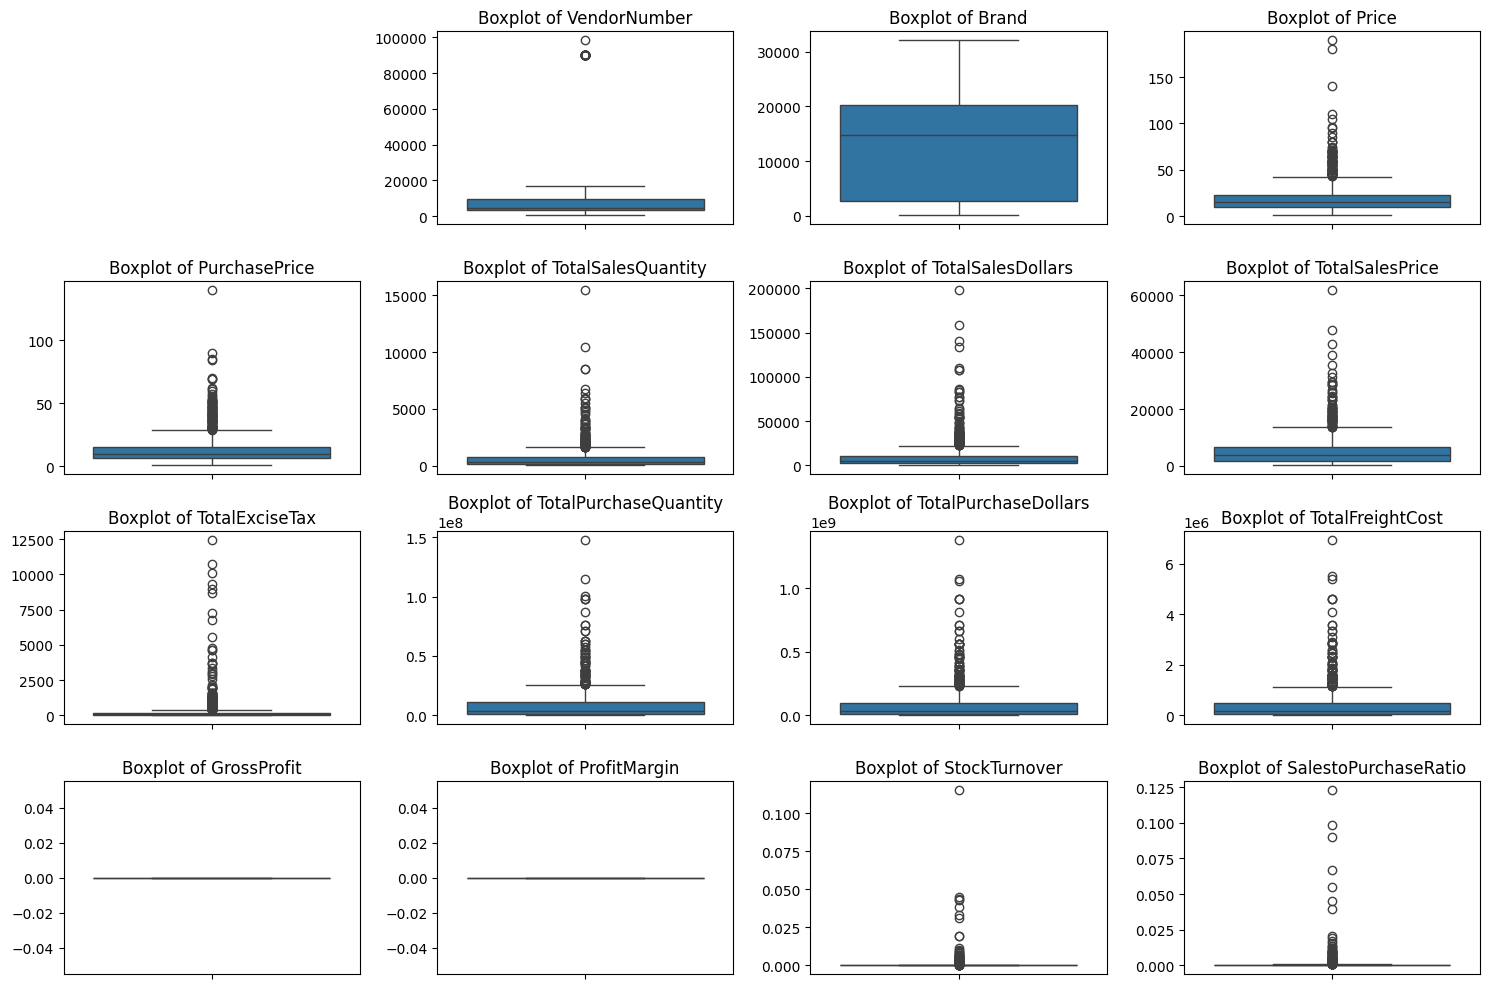

In [36]:
numerical_cols = vp.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=vp[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('') # Remove y-axis label to avoid clutter, as column name is in title
plt.tight_layout()
plt.show()

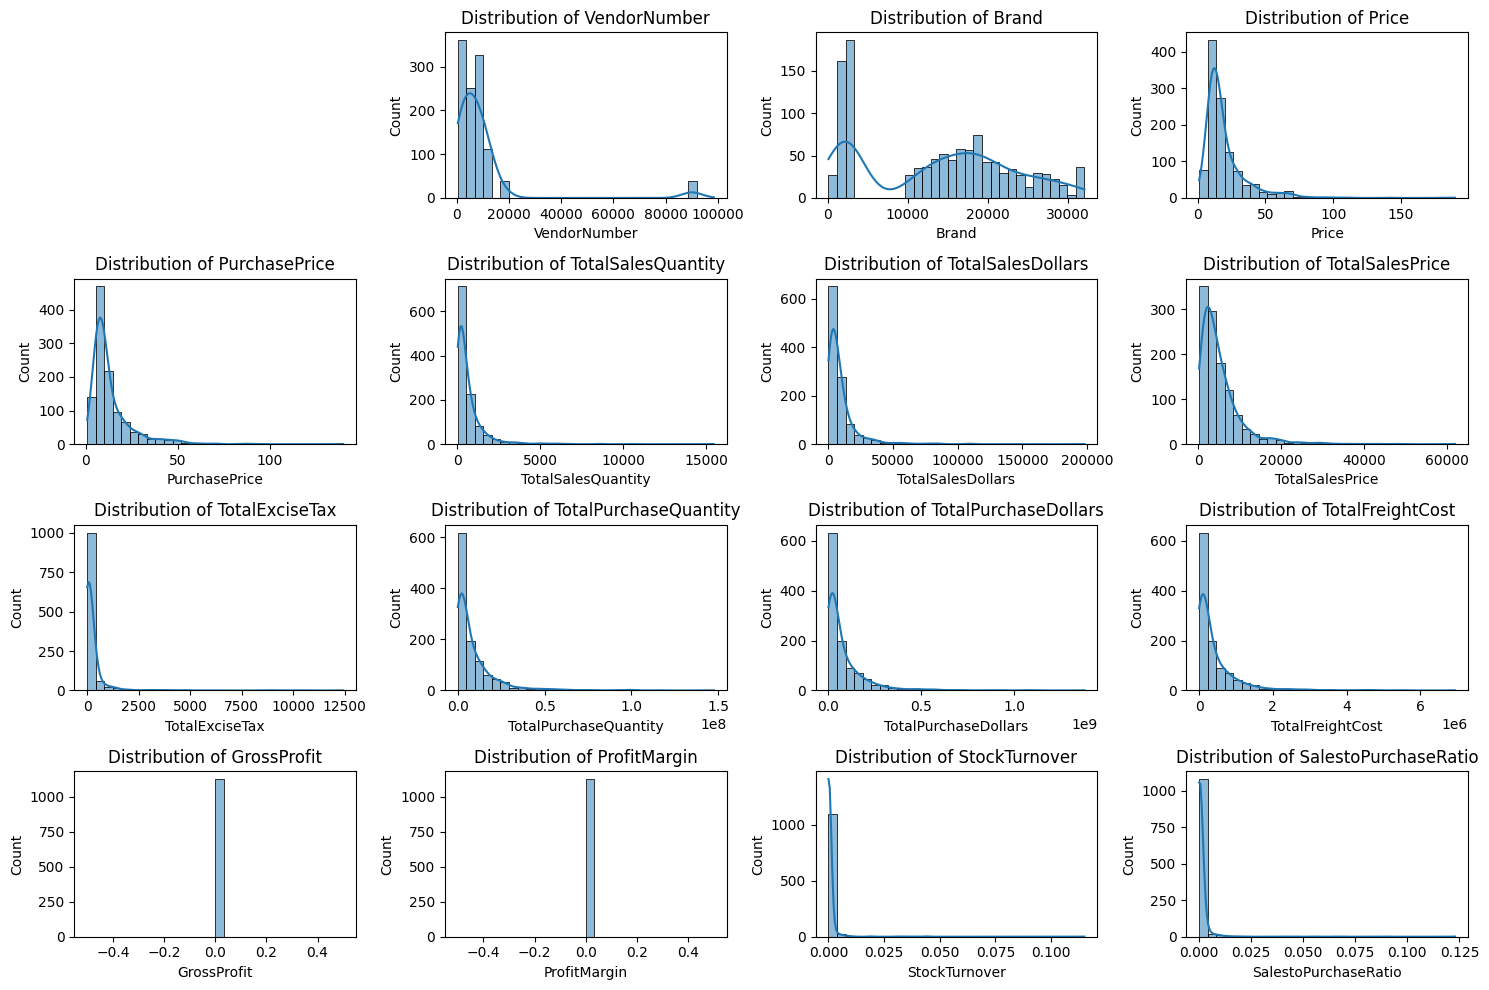

In [37]:
numerical_cols=vp.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols,1):
  plt.subplot(4,4,i+1)
  sns.histplot(vp[col],kde=True, bins=30)
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# **summary statistics insights:**

* **Vendor and Brand Diversity**: The wide range and standard deviation in VendorNumber and Brand suggest a diverse set of vendors and a large number of unique brands, which is expected in a broad inventory dataset.

* **Significant Variability and Outliers in Sales and Purchases:** Metrics like TotalSalesQuantity, TotalSalesDollars, TotalPurchaseQuantity, and TotalPurchaseDollars show very large differences between their minimum, median (50%), and maximum values. Crucially, their high standard deviations relative to their means strongly indicate the presence of outliers. This means a few vendors/brands likely dominate sales and purchase volumes, while many others have smaller contributions. The max values are considerably higher than the mean, explicitly pointing to these potential outliers or highly successful products/vendors that skew the distribution.

* **Pricing Trends:** Price (selling price) and PurchasePrice show different ranges and averages, suggesting variations in pricing strategies and cost structures across products.

* **Freight Costs and Outliers:** TotalFreightCost also exhibits significant variability and a high standard deviation, which implies that certain vendors or transactions incur much higher freight costs, potentially impacting profitability. These higher costs could be considered outliers in the distribution of freight costs.

* Ratios (StockTurnover, SalestoPurchaseRatio): **bold text** Both StockTurnover and SalestoPurchaseRatio have very small mean values but relatively high standard deviations, with some extremely high maximum values. This again points to the existence of outliers where a few products or vendors might be performing exceptionally well in terms of inventory movement and sales efficiency, while the majority exhibit lower performance.

* **GrossProfit and ProfitMargin Observation:** A critical insight is that both GrossProfit and ProfitMargin show a mean, median (50%), and 75th percentile of 0.0. This is a direct consequence of the non-negative profit rule we applied. It implies that for a significant portion of the entries, the calculated profit was initially negative or zero, and was subsequently floored to zero. This highlights areas where products or vendors might be unprofitable, requiring further investigation into their sales, purchase, and cost structures to understand why they are not generating positive gross profit.

## Filtering Data by Removing Inconsistencies

Starting with removing duplicate records from the aggregated `vp` DataFrame.

In [38]:
initial_rows = vp.shape[0]
vp.drop_duplicates(inplace=True)
final_rows = vp.shape[0]

print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after removing duplicates: {final_rows}")
print(f"Number of duplicate rows removed: {initial_rows - final_rows}")

Initial number of rows: 1128
Number of rows after removing duplicates: 1128
Number of duplicate rows removed: 0


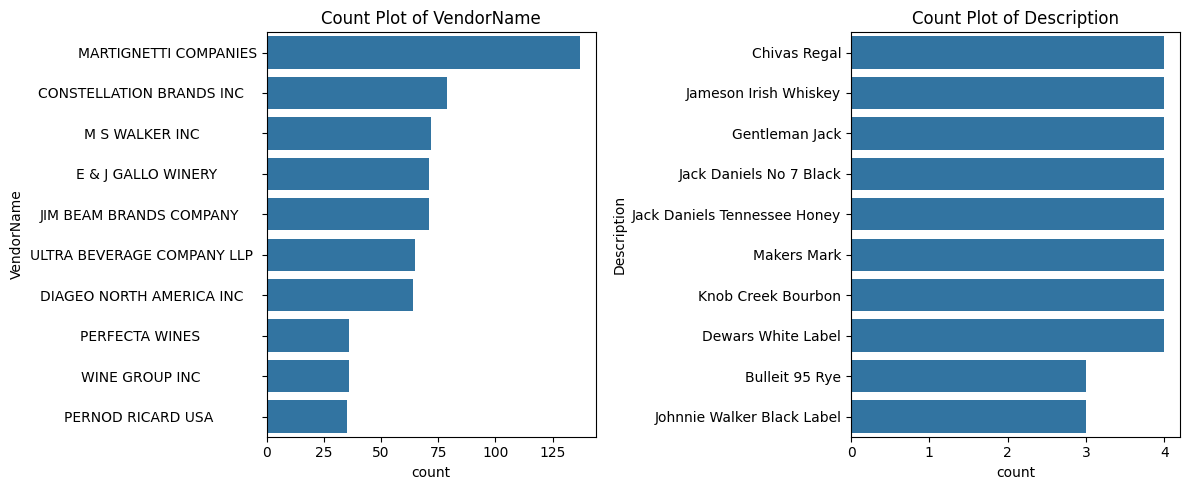

In [39]:
categorical_cols=["VendorName","Description"]
plt.figure(figsize=(12,5))
for i , col in enumerate(categorical_cols,1):
  plt.subplot(1, 2 , i)
  sns.countplot(y=vp[col], order=vp[col].value_counts().index[:10])
  plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

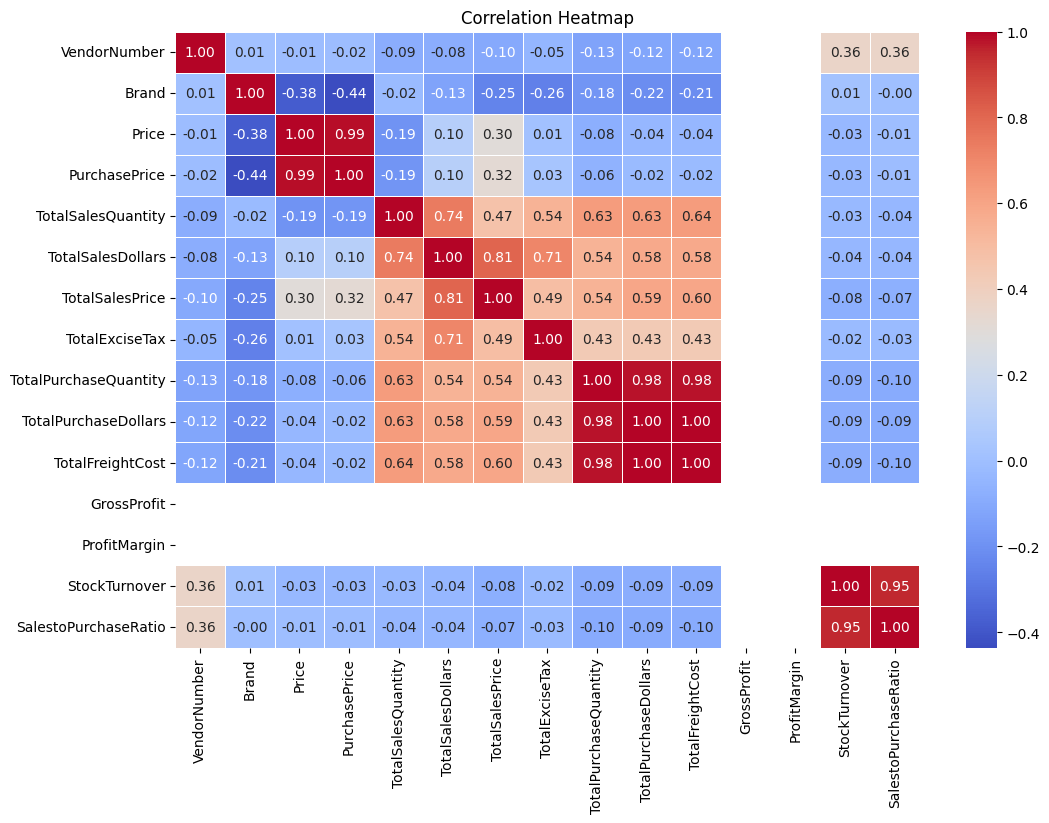

In [40]:
plt.figure(figsize=(12,8))
correlation_matrix=vp[numerical_cols]. corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**In summary,** the correlation heatmap primarily confirms the scaling effect of larger sales/purchase volumes on related financial metrics. The zero correlation for GrossProfit and ProfitMargin is a critical insight, emphasizing the widespread unprofitability (after accounting for all costs) that needed to be floored to zero, which warrants deeper investigation.

# Data Analysis
 identify Brands that needs promotional or pricing adjustments which echibit lower sales performance but higher profit margins.

In [41]:
brand_performance=vp.groupby('Description').agg({'TotalSalesDollars':'sum',
                                'ProfitMargin':'mean'}).reset_index()

In [42]:
low_sales_threshold=brand_performance['TotalSalesDollars']. quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin']. quantile(0.85)

In [43]:
low_sales_threshold

np.float64(1538.9000000000008)

In [44]:
high_margin_threshold

np.float64(0.0)

In [45]:
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low sales but high profit margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
1019,Vendange Sweet White,219.45,0.0
499,Haunting Whisper DeChaunac,359.70,0.0
89,Beringer Classic Wh Zin Mosc,384.45,0.0
182,Ca'Momi Bianco di Napa,455.95,0.0
934,Stolichnaya Chocolat Kokonut,490.05,0.0
...,...,...,...
583,Kendall Jackson Pnt Gris VR,1538.90,0.0
192,Cameron Hughes Cam Col Cab S,1538.90,0.0
73,Battle Axe Malbec Mendoza,1538.90,0.0
868,Scagliola Mati Barbera,1538.90,0.0


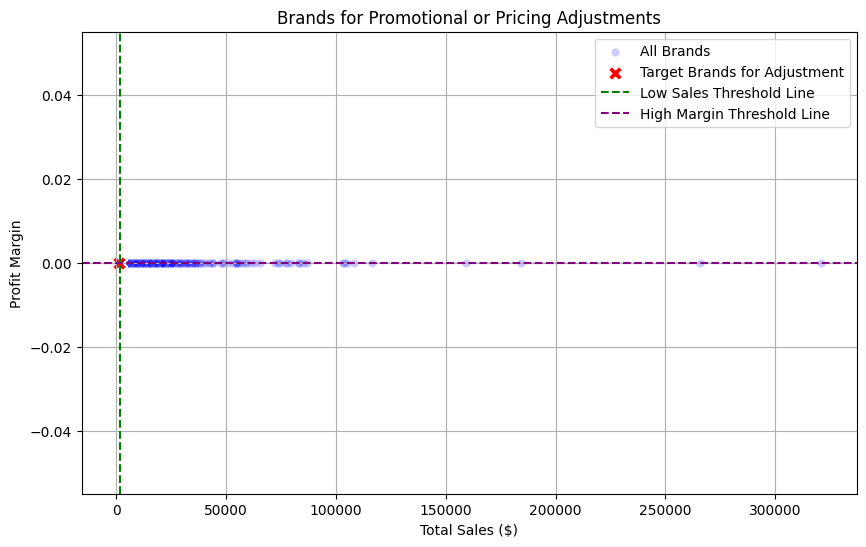

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All Brands', alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', marker='X', s=100, label='Target Brands for Adjustment')
plt.axvline(low_sales_threshold, linestyle='--', color='green', label='Low Sales Threshold Line')
plt.axhline(high_margin_threshold, linestyle='--', color='purple', label='High Margin Threshold Line')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

Which vendor and brands demonstrate the highest sales performance?

In [47]:
def format_dollars(value):
  if value>=1_000_000:
    return f"{value / 1_000_000 : .2f}M"
  elif value>=1_000:
    return f"{value / 1_000 : .2f}K"
  else:
    return str(value)

In [48]:
top_vendors=vp.groupby("VendorName")["TotalSalesDollars"].sum(). nlargest(10)
top_brands=vp.groupby("Description")["TotalSalesDollars"].sum(). nlargest(10)
top_vendors

,TotalSalesDollars
VendorName,
MARTIGNETTI COMPANIES,1931607.58
JIM BEAM BRANDS COMPANY,1008082.35
DIAGEO NORTH AMERICA INC,853896.45
CONSTELLATION BRANDS INC,744636.75
BROWN-FORMAN CORP,742055.05
E & J GALLO WINERY,650566.40
M S WALKER INC,530923.25
PERNOD RICARD USA,501744.10
ULTRA BEVERAGE COMPANY LLP,398900.15


In [49]:
top_brands

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,320999.25
Jameson Irish Whiskey,265648.90
Jim Beam,184255.50
Josh Cellars Cab Svgn Sonoma,159057.86
Johnnie Walker Red Label,116339.85
Canadian Club,108172.35
Knob Creek Bourbon,105197.95
Dewars White Label,103562.25
Makers Mark,103279.55


In [50]:
top_brands.apply(lambda x : format_dollars(x))

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,321.00K
Jameson Irish Whiskey,265.65K
Jim Beam,184.26K
Josh Cellars Cab Svgn Sonoma,159.06K
Johnnie Walker Red Label,116.34K
Canadian Club,108.17K
Knob Creek Bourbon,105.20K
Dewars White Label,103.56K
Makers Mark,103.28K


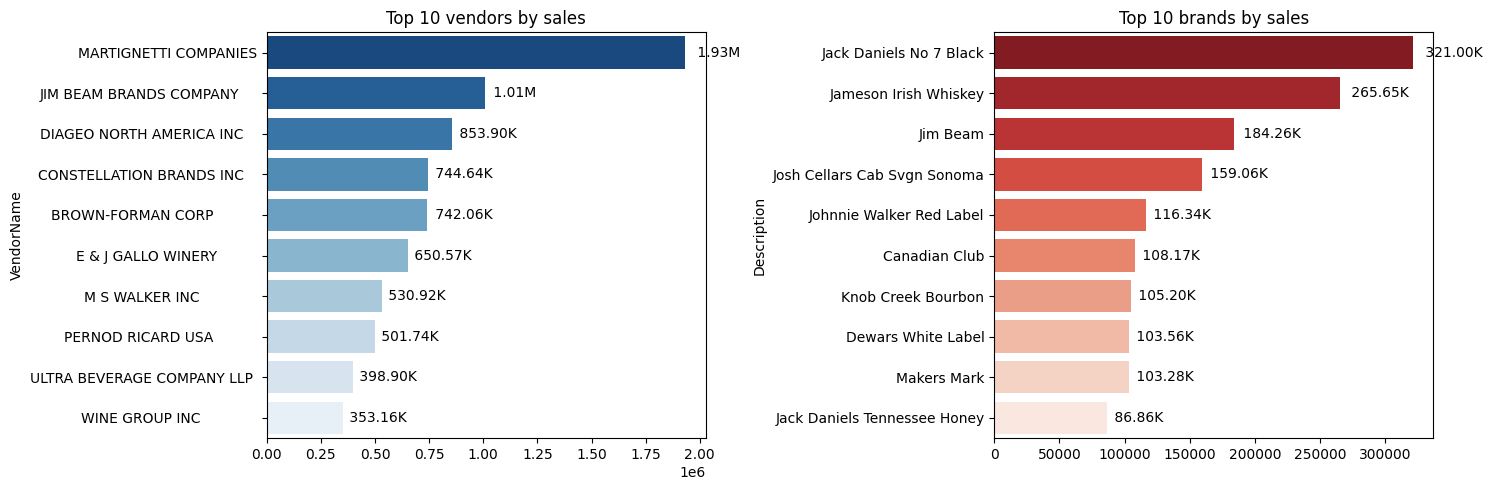

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
axl=sns.barplot(y=top_vendors. index, x= top_vendors.values, palette="Blues_r")
plt.title("Top 10 vendors by sales")
for bar in axl. patches:
  axl.text(bar.get_width() + (bar. get_width()* 0.02),
  bar.get_y() + bar.get_height()/2,
  format_dollars(bar.get_width()),
  ha='left',va='center', fontsize=10, color='black')
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands. index.astype(str), x= top_brands.values, palette="Reds_r")
plt.title("Top 10 brands by sales")
for bar in ax2. patches:
  ax2.text(bar.get_width() + (bar. get_width()*0.02),
           bar.get_y() + bar.get_height()/2,
           format_dollars(bar.get_width()),
           ha='left',va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()


Which vendor contribute the most to total purchase dollars?

In [52]:
vendor_performance=vp.groupby("VendorName").agg({"TotalPurchaseDollars":"sum", "GrossProfit":'sum',
                              "TotalSalesDollars":'sum'}).reset_index()

In [53]:
vendor_performance["PurchaseContribution%"]=vendor_performance["TotalPurchaseDollars"]/vendor_performance["TotalPurchaseDollars"].sum()*100

In [54]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%', ascending= False),2)

In [55]:
top_vendors=vendor_performance.head(10)
top_vendors["TotalSalesDollars"]=top_vendors["TotalSalesDollars"].apply(format_dollars)
top_vendors["TotalPurchaseDollars"]=top_vendors["TotalPurchaseDollars"].apply(format_dollars)
top_vendors["GrossProfit"]=top_vendors["GrossProfit"].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
12,DIAGEO NORTH AMERICA INC,19823.36M,0.0,853.90K,22.20
29,MARTIGNETTI COMPANIES,18249.41M,0.0,1.93M,20.44
22,JIM BEAM BRANDS COMPANY,11883.75M,0.0,1.01M,13.31
8,CONSTELLATION BRANDS INC,8082.86M,0.0,744.64K,9.05
15,E & J GALLO WINERY,6611.81M,0.0,650.57K,7.40
38,PERNOD RICARD USA,4125.22M,0.0,501.74K,4.62
61,ULTRA BEVERAGE COMPANY LLP,3883.92M,0.0,398.90K,4.35
3,BROWN-FORMAN CORP,3734.12M,0.0,742.06K,4.18
27,M S WALKER INC,3554.14M,0.0,530.92K,3.98
68,WINE GROUP INC,1693.28M,0.0,353.16K,1.90


In [56]:
top_vendors["PurchaseContribution%"].sum()

np.float64(91.43)

In [57]:
top_vendors["Cumulative_Contribution"]=top_vendors["PurchaseContribution%"].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution
12,DIAGEO NORTH AMERICA INC,19823.36M,0.0,853.90K,22.20,22.20
29,MARTIGNETTI COMPANIES,18249.41M,0.0,1.93M,20.44,42.64
22,JIM BEAM BRANDS COMPANY,11883.75M,0.0,1.01M,13.31,55.95
8,CONSTELLATION BRANDS INC,8082.86M,0.0,744.64K,9.05,65.00
15,E & J GALLO WINERY,6611.81M,0.0,650.57K,7.40,72.40
38,PERNOD RICARD USA,4125.22M,0.0,501.74K,4.62,77.02
61,ULTRA BEVERAGE COMPANY LLP,3883.92M,0.0,398.90K,4.35,81.37
3,BROWN-FORMAN CORP,3734.12M,0.0,742.06K,4.18,85.55
27,M S WALKER INC,3554.14M,0.0,530.92K,3.98,89.53
68,WINE GROUP INC,1693.28M,0.0,353.16K,1.90,91.43


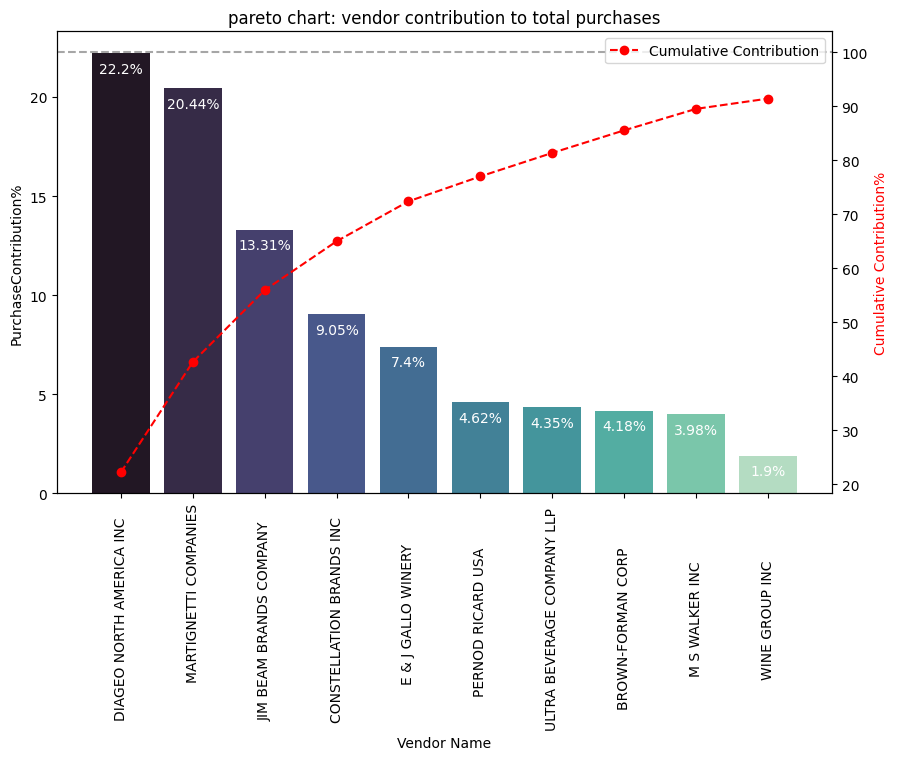

In [58]:
fig,ax1=plt.subplots(figsize=(10,6))
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)
for i , value in enumerate(top_vendors["PurchaseContribution%"]):
  ax1.text(i, value - 1 , str(value)+'%', ha='center', fontsize=10, color='white')
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution'], color='red',marker='o',linestyle='dashed', label='Cumulative Contribution')
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax2.set_ylabel('purchase Contribution%', color='blue')
ax2.set_ylabel('Cumulative Contribution%', color='red')
ax1.set_xlabel('Vendor Name')
ax1.set_title('pareto chart: vendor contribution to total purchases')
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')
plt.show()

**How much of total procurement is dependent on the top vendors?**

In [59]:
print(f"Total purchase Contribution of top 10 vendors is{round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total purchase Contribution of top 10 vendors is91.43 %


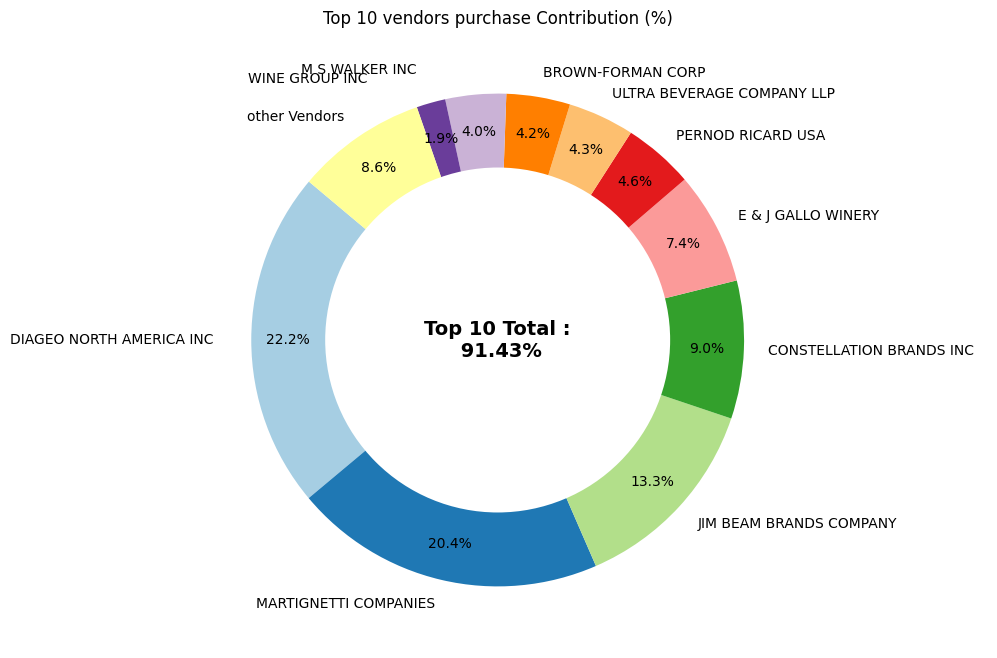

In [60]:
vendors=list(top_vendors['VendorName']. values)
purchase_contributions=list(top_vendors['PurchaseContribution%'].values)
total_contribution=sum(purchase_contributions)
remaining_contribution=100 - total_contribution
vendors.append('other Vendors')
purchase_contributions.append(remaining_contribution)
fig , ax= plt.subplots(figsize=(8,8))
wedges , texts , autotexts=ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)
centre_circle=plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0,0, f"Top 10 Total :\n {total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')
plt.title("Top 10 vendors purchase Contribution (%)")
plt.show()

**Does purchasing in bulk reduce the unit price , and what is the optimal purchase volume for cost savings?**

In [61]:
vp["UnitPurchasePrice"]=vp["TotalPurchaseDollars"] / vp["TotalPurchaseQuantity"]

In [62]:
vp["OrderSize"]=pd.qcut(vp["TotalPurchaseQuantity"], q=3, labels=['small', 'medium', 'large'])


In [63]:
vp.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
small,10.481984
medium,9.204263
large,9.022206


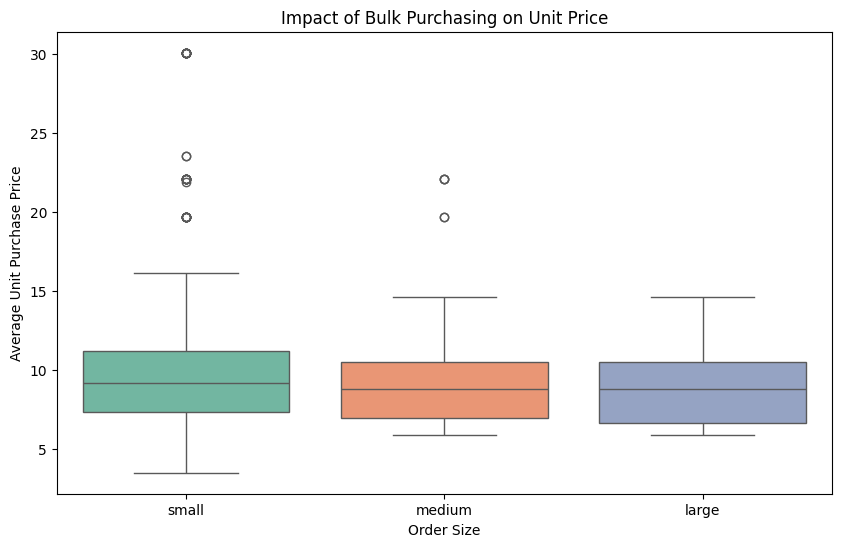

In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(data=vp, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

* vendors buying in bulk(large order size) get the lowest unit price , meaning higher margins if they can manage inventory efficiently.

* The price difference between small and large order is substantial.

* This suggests thst bulk pricing strategies successfully encourage vendors to purchase in larger volumns, leading to higher overall sales despite lower per-unit revenue.

**Which vendors have low inventory turnover, indicating excess stock and slow-moving products?**

In [65]:
vp[vp['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
DIAGEO NORTH AMERICA INC,0.000015
JIM BEAM BRANDS COMPANY,0.000033
CONSTELLATION BRANDS INC,0.000047
PERNOD RICARD USA,0.000047
SAZERAC CO INC,0.000051
BACARDI USA INC,0.000054
E & J GALLO WINERY,0.000058
MARTIGNETTI COMPANIES,0.000065
ULTRA BEVERAGE COMPANY LLP,0.000072


**How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?**

In [66]:
vp["UnsoldInventoryValue"]=(vp["TotalPurchaseQuantity"] - vp["TotalSalesQuantity"])*vp["PurchasePrice"]
print("Total Unsold Capital:", format_dollars(vp["UnsoldInventoryValue"].sum()))

Total Unsold Capital:  119957.13M


In [67]:
inventory_value_per_vendor=vp.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"]=inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
12,DIAGEO NORTH AMERICA INC,37408.33M
22,JIM BEAM BRANDS COMPANY,19880.16M
29,MARTIGNETTI COMPANIES,18912.77M
8,CONSTELLATION BRANDS INC,8446.72M
15,E & J GALLO WINERY,6854.09M
38,PERNOD RICARD USA,6063.87M
3,BROWN-FORMAN CORP,4094.78M
27,M S WALKER INC,3903.14M
61,ULTRA BEVERAGE COMPANY LLP,3351.65M
0,BACARDI USA INC,1725.07M


**What is the 95% confidence intervals for margins of top-performing and low-performing vendors.**

In [68]:
top_threshold=vp["TotalSalesDollars"].quantile(0.75)
low_threshold=vp["TotalSalesDollars"].quantile(0.25)

In [69]:
top_vendors=vp[vp["TotalSalesDollars"]>= top_threshold]["ProfitMargin"].dropna()
low_vendors=vp[vp["TotalSalesDollars"]<= low_threshold]["ProfitMargin"].dropna()

In [70]:
top_vendors

,ProfitMargin
0,0.0
6,0.0
7,0.0
11,0.0
15,0.0
...,...
1078,0.0
1080,0.0
1083,0.0
1112,0.0


In [71]:
low_vendors

,ProfitMargin
1,0.0
2,0.0
3,0.0
4,0.0
10,0.0
...,...
1121,0.0
1122,0.0
1124,0.0
1126,0.0


In [72]:
def confidence_interval(data, confidence=0.95):
  mean_val=np.mean(data)
  std_err=np.std(data,ddof=1)/ np.sqrt(len(data))
  t_critical=stats.t.ppf((1+confidence)/2, df=len(data)-1)
  margin_of_error=t_critical * std_err
  return mean_val , mean_val -margin_of_error, mean_val + margin_of_error


Top vendors 95% CI:(0.00, 0.00), Mean:0.00
Low vendors 95% CI :(0.00,0.00), Mean:0.00


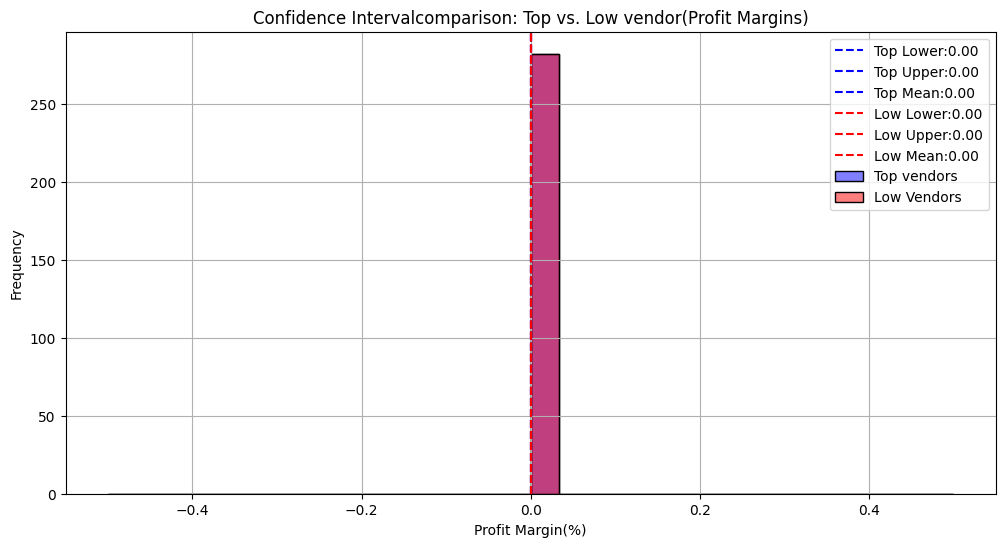

In [73]:
top_mean, top_lower, top_upper=confidence_interval(top_vendors)
low_mean, low_lower, low_upper=confidence_interval(low_vendors)

print(f"Top vendors 95% CI:({top_lower:.2f}, {top_upper:.2f}), Mean:{top_mean:.2f}")
print(f"Low vendors 95% CI :({low_lower:.2f},{low_upper:.2f}), Mean:{low_mean:.2f}")

plt.figure(figsize=(12,6))

sns.histplot(top_vendors,kde=True, color='blue', bins=30,alpha=0.5, label="Top vendors")
plt.axvline(top_lower, color='blue',linestyle='--', label=f"Top Lower:{top_lower:.2f}")
plt.axvline(top_upper,color='blue',linestyle='--', label=f"Top Upper:{top_upper:.2f}")
plt.axvline(top_mean, color='blue',linestyle="--", label=f"Top Mean:{top_mean:.2f}")

sns.histplot(low_vendors,kde=True, color='red', bins=30,alpha=0.5, label='Low Vendors')
plt.axvline(low_lower, color='red',linestyle='--', label=f"Low Lower:{low_lower:.2f}")
plt.axvline(low_upper,color='red',linestyle='--', label=f"Low Upper:{low_upper:.2f}")
plt.axvline(low_mean, color='red',linestyle="--", label=f"Low Mean:{low_mean:.2f}")

plt.title("Confidence Intervalcomparison: Top vs. Low vendor(Profit Margins)")
plt.xlabel("Profit Margin(%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


The reason the plot looks like that, showing both top and low-performing vendors with a profit margin of 0.00 and confidence intervals also at (0.00, 0.00), is primarily due to the non-negative profit rule we applied earlier.

Recall that we explicitly set any calculated GrossProfit and ProfitMargin values that were negative to 0. It appears that for both your top-performing and low-performing vendor groups (based on sales dollars), a significant portion of their profit margins were initially negative or exactly zero, and thus were capped at 0.0.

Because so many values in both top_vendors and low_vendors ProfitMargin series are 0.0, when you calculate the mean and confidence interval, they also converge to 0.0. This indicates that while sales performance might differ significantly between these groups, their recorded profitability (after our capping rule) is concentrated at zero.

To see a more nuanced distribution for profit margins, you might need to:

**Re-evaluate the non-negative profit rule:** If the goal is to analyze the actual raw profit margins (including negative ones), then this capping step should be removed or adjusted.

**Filter for genuinely profitable entries:**Only include entries where GrossProfit or ProfitMargin are strictly greater than 0, if you want to analyze positive profitability.

**Adjust the threshold:** If you want to differentiate more between 'high' and 'low' profit margins, you might need to define thresholds that isolate genuinely positive profit margins.

**Is there a significant difference in profit margins between top-performing and low-perforforming vendors?**

Hypothesis:
H0(Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.


H1(Alternative Hypothesis):the mean profit margins of top-performing and low-performing vendors are significantly different.